<a href="https://colab.research.google.com/github/Rohit-Roby/Project/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install objaverse
!pip install trimesh
!pip install open3d

/usr/lib/python3/dist-packages
rm -r blinker
rm -r /usr/lib/python3/dist-packages

In [5]:
!pip install torchsummary

In [1]:
# Import libraries
import objaverse
import nltk
from nltk.corpus import stopwords  # for stop word removal
from nltk.stem import PorterStemmer  # for stemming (or use WordNetLemmatizer for lemmatization)
import string
import trimesh
import os
import shutil
import multiprocessing
nltk.download('stopwords')
import numpy as np
from matplotlib import pyplot as plt
import open3d as o3d
import torch
import torchsummary

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Loading the dataset files and dowloading 3d model**

In [2]:
#loading Uids
uids = objaverse.load_uids()
len(uids), type(uids)

# lvis_annotations
lvis_annotations = objaverse.load_lvis_annotations()

# Sort the dictionary by value in descending order and select the top 20 items
top_10_items = dict(sorted(lvis_annotations.items(), key=lambda item: len(item[1]), reverse=True)[:10])
top_10_items.keys()

dict_keys(['chair', 'seashell', 'antenna', 'shield', 'snowman', 'chandelier', 'gravestone', 'cone', 'control', 'sword'])

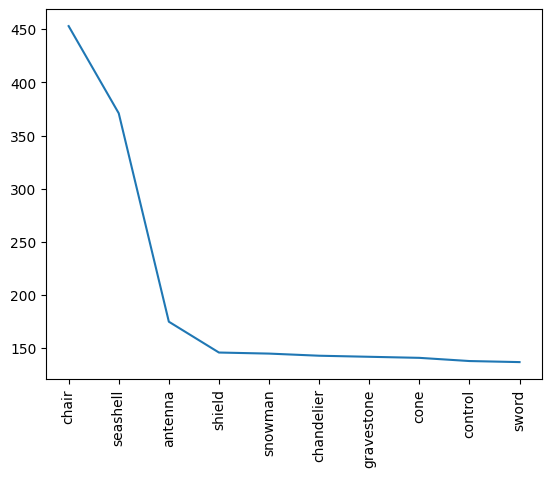

In [3]:

# Plot the keys against the lengths of the values
plt.xticks(rotation='vertical')
plt.plot(list(top_10_items.keys()), [len(value) for value in top_10_items.values()])
plt.show()


In [4]:
# Load Objaverse annotations
top_10_uids = []  # Initialize an empty list
for uid_list in top_10_items.values():
    top_10_uids.extend(uid_list)  # Add UIDs individually


In [5]:
annotations = objaverse.load_annotations(top_10_uids)

 99%|█████████▉| 159/160 [00:55<00:00,  2.87it/s]


In [6]:
# objaverse_description = []
for annotation in annotations.values():
    if isinstance(annotation, dict):
        tags = annotation.get("tags")  # No default value, get returns 'None' if key is missing
        if tags:  # Check if tags exists
            tag_descriptions = [tag['name'] for tag in tags]
            # ... (Rest of your code)
            description = " ".join(tag_descriptions)
             # Store tags and description with annotation
            annotation["description"] = description  # adding a description field
            # objaverse_description.append(description)

In [7]:
import pandas as pd
df = pd.DataFrame()
df['uids'] = top_10_uids
# df['face_count'] = annotations[df['uids']]['archives']['glb']['faceCount']
# df['face_count'] = df['uids'].map(lambda x: annotations[x]['archives']['glb']['faceCount'] if x in annotations else None)
# df['vertex_count'] = df['uids'].map(lambda x: annotations[x]['archives']['glb']['vertexCount'] if x in annotations else None)
# df['texture_count'] = df['uids'].map(lambda x: annotations[x]['archives']['glb']['textureCount'] if x in annotations else None)
# df['textureMaxResolution'] = df['uids'].map(lambda x: annotations[x]['archives']['glb']['textureMaxResolution'] if x in annotations else None)


In [8]:
# processes = multiprocessing.cpu_count()
# processes
# objects = objaverse.load_objects(
#     uids = df['uids'],
#     download_processes = processes
# )

In [9]:
# # Define the subfolder and parent folder paths
# parent_dir = '/root/.objaverse/hf-objaverse-v1/glbs'

# # Walk through the parent directory
# for subdir, dirs, files in os.walk(parent_dir):
#     for file in files:
#         # Construct the file path
#         file_path = os.path.join(subdir, file)
#         # Construct the destination path
#         dest_path = os.path.join(parent_dir, file)
#         # Move the file to the parent directory
#         shutil.move(file_path, dest_path)
#     # If the current directory is not the parent directory, delete the subdirectory
#     if subdir != parent_dir:
#         os.rmdir(subdir)
# df['glb_path'] = df['uids'].map(lambda x: objects[x])

**Preprocessing of Text Description**

In [10]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def clean_description(description):
    # Define stop words
    stop_words = set(stopwords.words("english"))

    # # Clean text descriptions
    # cleaned_descriptions = []
    # for description in description:
    # Remove punctuation
    text = description.translate(str.maketrans('', '', string.punctuation))

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lowercase conversion
    text = text.lower()

    # Stemming (or lemmatization)
    stemmer = PorterStemmer()  # You can replace this with WordNetLemmatizer for lemmatization
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text
    # Add cleaned text to list
  #   cleaned_descriptions.append(text)
  #   annotations['description']
  # # Save cleaned descriptions for further processing
  # with open("cleaned_descriptions.txt", 'w') as f:
  #   f.write('\n'.join(cleaned_descriptions))

    # print("Data collection and cleaning complete!")


df['description'] = df['uids'].map(lambda uid: clean_description( annotations[uid]['description']))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
import numpy as np
df['description'].replace('', np.nan, inplace=True)
df = df.dropna()

In [12]:
df.to_csv('/root/.objaverse/Dataset')

In [13]:
import pandas as pd
df = pd.read_csv('/root/.objaverse/Dataset')

In [14]:
df.head()

,Unnamed: 0,uids,description
0,0,304253851afd493d958fc8e256c189df,a wooden chair use classroom
1,1,8a4a3a90bc104f11b82cedd9b4e5ab6b,newfield design galleri
2,2,fab9443d48e24fbfa309187df78d58e6,newfield design galleri
3,3,ad0b974411d94ec2bd2bd62b701018bc,newfield design galleri
4,4,d9a81a38147440c8a2ac92a26d62d895,newfield design galleri


In [ ]:
processes = multiprocessing.cpu_count()
processes
objects = objaverse.load_objects(
    uids = df['uids'],
    download_processes = processes
)

starting download of 1671 objects with 96 processes
Downloaded 1 Downloaded/  Downloaded16712  objects 3
/  /1671 1671  objectsobjects

Downloaded 5Downloaded /  Downloaded91671 Downloaded  /Downloadedobjects17Downloaded 
 18  /  21 251671/ 1671    //objects1671objects  
 Downloaded
Downloaded16711671objects  
  objectsobjects4242

  Downloaded//Downloaded   DownloadedDownloaded16711671 50  50  objects objects Downloaded/Downloaded5151

/Downloaded     1671Downloaded/ /Downloaded1671 Downloaded57Downloaded    58Downloaded62   objectsDownloaded 16711671DownloadedobjectsDownloaded 5  /63 
64  
/  / 63 65  objects objects 66/1671 Downloaded Downloaded/ 66Downloaded/1671

66Downloaded  1671 / /       /1671 objects 1671 Downloaded /objects72167172/73 objects 1671 
731671  
    1671 
objects objectsDownloaded  1671Downloaded/objects/741671 /

objects/DownloadedDownloadedobjects  
 Downloaded  Downloaded  DownloadedobjectsDownloadedDownloaded Downloaded 

objects1671 79Downloaded /167180objec

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Downloaded /objects821 
 1671/  1671objects 
objects
DownloadedDownloaded  823823  //  16711671  objectsobjects

Downloaded 825Downloaded Downloaded / 827 827 1671DownloadedDownloaded /   / objects828828 1671
 1671  / /objects objects
 1671
1671  objectsobjects

Downloaded 830 Downloaded/Downloaded   1671830831   objects//
  16711671  objectsobjectsDownloaded

 833 /Downloaded  1671833 objects Downloaded
/ 834  1671/  objects1671
 objects
Downloaded 835 / 1671 objects
Downloaded Downloaded837  837/  1671/  objects1671
 Downloadedobjects 
839 / 1671 objectsDownloaded
 840 Downloaded/  8401671  /objects 
1671 objects
Downloaded 841 Downloaded /843 Downloaded 1671  Downloaded/845objects   
1671/845Downloaded   1671 objects/ 847 
objects1671 Downloaded
 / objects847 
1671 / Downloaded objects 1671
 847 objects/
 1671 objects
DownloadedDownloaded Downloaded 852  852852/Downloaded   / /1671853   16711671  /Downloaded objectsDownloadedobjects objects  

1671
853854   objects//
  1671Download

Exception in thread Thread-13 (_handle_results):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 579, in _handle_results
    task = get()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
TypeError: ContentTooShortError.__init__() missing 1 required positional argument: 'content'


/
1671  1671objects 
objects
Downloaded 1295 / 1671 objects
Downloaded 1296 / 1671 objects
Downloaded 1297 /Downloaded  16711298  objects/
 1671 objects
DownloadedDownloaded  13001300  / / 1671 1671objects Downloaded
objects 
1302Downloaded  /1302  1671/  objects1671
 Downloadedobjects 
1303 / 1671 objects
Downloaded Downloaded1306  1306/  / 1671 1671 objectsobjects

Downloaded 1306Downloaded  1307/  / 16711671  objectsobjects

Downloaded 1308 / 1671 objects
Downloaded 1309 / 1671 objects
Downloaded 1310 / 1671 objects
Downloaded 1311 / 1671Downloaded  objects1312
 / 1671Downloaded  1314objects 
Downloaded/  16711314  objects/
 1671 objects
DownloadedDownloadedDownloaded   131713171317   ///   167116711671   objectsobjectsobjects


Downloaded 1318 / 1671 objects
Downloaded 1319 / 1671 objects
Downloaded 1320 / 1671 objects
Downloaded 1321 / 1671 objects
Downloaded 1322 / 1671 objects
Downloaded 1323 / 1671 objects
Downloaded 1324 / 1671 objects
Downloaded 1325 / 1671 objects
Downloaded

In [ ]:
# Define the subfolder and parent folder paths
parent_dir = '/root/.objaverse/hf-objaverse-v1/glbs'

# Walk through the parent directory
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        # Construct the file path
        file_path = os.path.join(subdir, file)
        # Construct the destination path
        dest_path = os.path.join(parent_dir, file)
        # Move the file to the parent directory
        shutil.move(file_path, dest_path)
    # If the current directory is not the parent directory, delete the subdirectory
    if subdir != parent_dir:
        os.rmdir(subdir)

df['glb_path'] = df['uids'].map(lambda x: objects[x])

In [ ]:
df.head()

In [ ]:
import re
# Function to remove "/glbs"
def remove_glbs(path):
    return re.sub(r'\d{3}-\d{3}/', '', path)    # Replace '/glbs' with an empty string

# Apply the function using map
df['glb_path'] = df['glb_path'].map(remove_glbs)

In [ ]:
df.head()

**Preprocessing of 3d model into point cloud**

In [ ]:
import os
def get_model_paths(base_dir):
    model_paths = []
    for subdir, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".glb"):
                file_path = os.path.join(subdir, file)
                model_paths.append(file_path)
    return model_paths
base_dir ='/root/.objaverse/hf-objaverse-v1/glbs'
model_paths = get_model_paths(base_dir)

In [ ]:
df.head()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# glbs = model_paths[0:5]
# # Create a figure and axes for the subplots
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# # Loop through each subplot and display the mesh
# for i, ax in enumerate(axs.flat):
#     # Plot mesh in each subplot
#     for glb in glbs:
#       if glb:
#           mesh = o3d.io.read_triangle_mesh(glb)
#           ax = o3d.visualization.draw_plotly([mesh])
#       else:
#           # Hide empty subplots
#           ax.axis('off')
# plt.show()


In [ ]:
!pip install pygltflib

**Voxelization using numpy**

In [ ]:
import numpy as np
import os
from scipy.ndimage import zoom
from multiprocessing import Pool, cpu_count
import pygltflib

In [ ]:

def preprocess_glb(glb_path):
  # try:
      gltf = pygltflib.GLTF2().load(glb_path)

      # mesh = gltf.meshes[]
      # print(mesh)
      feature_vectors = []
      min_coords = np.inf * np.ones(3)  # Initialize with positive infinity
      max_coords = -np.inf * np.ones(3)  # Initialize with negative infinity

      for mesh in gltf.meshes:
          vertices_list = []
          normals_list = []
          faces_list = []
          # print(mesh)
          for primitive in mesh.primitives:
              # print(primitive)
              # Extract vertices
              vertices = np.array(primitive.attributes.POSITION)
              if vertices:
                vertices_list.append(vertices)
              # print(vertices_list)
              faces = np.array(primitive.indices)
              if faces:
                faces_list.append(faces)
              # print(faces)
              # Extract normals if available
              if primitive.attributes:
                  normals = np.array(primitive.attributes.NORMAL)
                  normals_list.append(normals)
              else:
                  # If normals are not available, you can compute them here
                  # For simplicity, let's assume all zeros
                  normals = np.zeros_like(vertices)
                  normals_list.append(normals)

              # Update bounding box
              min_coords = np.minimum(min_coords, np.min(vertices, axis=0))
              max_coords = np.maximum(max_coords, np.max(vertices, axis=0))

          # Concatenate vertices and normals for each mesh
          # vertices_concat = np.concatenate(vertices_list, axis=0)
          # normals_concat = np.concatenate(normals_list, axis=0)
          # faces_concat = np.concatenate(faces_list, axis=0)
          bounding_box = (min_coords , max_coords)
          # print(bounding_box)
          # print(vertices_list, normals_list,faces_list, bounding_box )
              # Create feature vector for the mesh
          # feature_vector = np.concatenate((vertices_concat,faces_concat, bounding_box, normals_concat), axis=1)

              # Append feature vector to the list
          # feature_vectors.append(feature_vector)

      return vertices_list, normals_list,faces_list, bounding_box

  # except Exception as e:
  #   print(f'Error preprocessing GLB files {glb_path}: {e}')

# preprocess_glb(glb)


In [ ]:
def preproccess_3d_model(model_path):
  # try:
    vertices, normals, faces, bounding_box = preprocess_glb(model_path)
    # print(vertices, faces, bounding_box, normals)
    # print(bounding_box)
    # print(bounding_box[1],bounding_box[0])
    if vertices is not None:
      voxel_grid = np.zeros((16,16,16))
      voxel_size = (bounding_box[1] - bounding_box[0]) / 15

      for point in vertices:
        voxel_index = ((point - bounding_box[0])/ voxel_size).astype(int)

        voxel_index = np.clip(voxel_index, 0, 15)
        voxel_grid[tuple(voxel_index)] = 1

      voxel_grid_normalized = voxel_grid * 2 -1
      return voxel_grid_normalized, bounding_box, normals, voxel_grid
    else:
      print('Error: unable to preprocess model')
      return None, None, None

  # except Exception as e:
  #   print(f'Error preprocessing 3d Model {model_path}: {e}')
  #   return None, None, None


**voxelization using open3d**

In [ ]:
dir = '/root/.objaverse/hf-objaverse-v1/glbs'
num_processes = multiprocessing.cpu_count()  # Use the number of CPU cores


In [ ]:
def o3d_voxelize(filepath):
    mesh = o3d.io.read_triangle_mesh(filepath)
    # os.path.split(filepath)[]
    print(mesh)
    # mesh.compute_vertex_normals()
    # fit to unit cube
    mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()),center=mesh.get_center())
    # o3d.visualization.draw([mesh])
    print('voxelization')
    voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size=0.05)
    # o3d.visualization.draw([voxel_grid])
    return voxel_grid

In [ ]:

#we convert to pytorch tensors to use later for training the GAN
def voxel_grid_to_tensor(voxel_grid, target_shape):
    voxels = np.asarray(voxel_grid.get_voxels())
    if len(voxels) == 0:
        return torch.empty(0)
    voxel_positions = np.array([voxel.grid_index for voxel in voxels])
    if voxel_positions.size == 0:
        return torch.empty(0)
    max_coords = voxel_positions.max(axis=0)
    tensor_shape = tuple(max_coords + 1)
    voxel_tensor = torch.zeros(tensor_shape, dtype=torch.float32)
    voxel_tensor[tuple(voxel_positions.T)] = 1

    # Rescale tensor to target shape
    scaling_factors = [target_shape[i] / voxel_tensor.shape[i] for i in range(3)]
    voxel_tensor_rescaled = torch.tensor(zoom(voxel_tensor, scaling_factors, order=0))  # Use nearest neighbor scaling

    # Print the final shape of the tensor
    print("Final tensor shape:", voxel_tensor_rescaled.shape)

    return voxel_tensor_rescaled



In [ ]:

#the following definitions are to check if the conversion from obj to voxel grid and then to tensor went well
#added an aspect ratio fix cause sometimes the bounding box was off which is we weird
def visualize_tensor(tensor):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    tensor_np = tensor.cpu().numpy()
    filled_voxels = np.argwhere(tensor_np > 0)
    ax.scatter(filled_voxels[:, 0], filled_voxels[:, 1], filled_voxels[:, 2])
    max_range = np.array([filled_voxels[:, 0].max()-filled_voxels[:, 0].min(),
                          filled_voxels[:, 1].max()-filled_voxels[:, 1].min(),
                          filled_voxels[:, 2].max()-filled_voxels[:, 2].min()]).max() / 2.0
    mid_x = (filled_voxels[:, 0].max() + filled_voxels[:, 0].min()) * 0.5
    mid_y = (filled_voxels[:, 1].max() + filled_voxels[:, 1].min()) * 0.5
    mid_z = (filled_voxels[:, 2].max() + filled_voxels[:, 2].min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    plt.show()


In [ ]:
df.head()

In [38]:
# voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths]

TriangleMesh with 388442 points and 627774 triangles.
voxelization
TriangleMesh with 149210 points and 252596 triangles.
voxelization
TriangleMesh with 93219 points and 113568 triangles.
voxelization
TriangleMesh with 118413 points and 223806 triangles.
voxelization
TriangleMesh with 120933 points and 186324 triangles.
voxelization
TriangleMesh with 7143 points and 11874 triangles.
voxelization
TriangleMesh with 5030 points and 9164 triangles.
voxelization
TriangleMesh with 26145 points and 52014 triangles.
voxelization
TriangleMesh with 169 points and 204 triangles.
voxelization
TriangleMesh with 2564 points and 3332 triangles.
voxelization
TriangleMesh with 32016 points and 58816 triangles.
voxelization
TriangleMesh with 320 points and 320 triangles.
voxelization
TriangleMesh with 350990 points and 432566 triangles.
voxelization
TriangleMesh with 4412 points and 4440 triangles.
voxelization
TriangleMesh with 436742 points and 498800 triangles.
voxelization
TriangleMesh with 4611 poin

<ipython-input-34-fdf8b573dfa7>:7: RuntimeWarning: divide by zero encountered in scalar divide
  mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()),center=mesh.get_center())


TriangleMesh with 8026 points and 16028 triangles.
voxelization
TriangleMesh with 196741 points and 264320 triangles.
voxelization
TriangleMesh with 1333 points and 1542 triangles.
voxelization
TriangleMesh with 7036 points and 14060 triangles.
voxelization
TriangleMesh with 6309 points and 8182 triangles.
voxelization
TriangleMesh with 576 points and 522 triangles.
voxelization
TriangleMesh with 113028 points and 204556 triangles.
voxelization
TriangleMesh with 547 points and 443 triangles.
voxelization
TriangleMesh with 575394 points and 654258 triangles.
voxelization
TriangleMesh with 466411 points and 746176 triangles.
voxelization
TriangleMesh with 163537 points and 265085 triangles.
voxelization
TriangleMesh with 42906 points and 67514 triangles.
voxelization
TriangleMesh with 14877 points and 19302 triangles.
voxelization
TriangleMesh with 4410 points and 4210 triangles.
voxelization
TriangleMesh with 345014 points and 474161 triangles.
voxelization
[Open3D INFO] Skipping non-tr

In [39]:
# voxel_grids[0]

VoxelGrid with 834 voxels.

In [40]:
# from scipy.ndimage import zoom

# voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths]

# target_shape = (32,32,32)
# # voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths]
# voxel_tensors = [voxel_grid_to_tensor(voxel_grid, target_shape) for voxel_grid in voxel_grids]

Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tensor shape: torch.Size([32, 32, 32])
Final tens

In [41]:
# model_index =5
# o3d.visualization.draw_geometries([voxel_grids[model_index]])
# print("Visualizing the tensor representation:")
# visualize_tensor(voxel_tensors[model_index])


**Visualizing voxel grid**

In [42]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# def visualize_voxel_grid(voxel_grid):
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     # Extract voxel grid dimensions
#     x_size, y_size, z_size = voxel_grid.shape

#     # Iterate over each voxel
#     for x in range(1):
#         for y in range(1):
#             for z in range(1):
#                 if voxel_grid[x, y, z] == 1:  # Filled voxel
#                     ax.scatter(x, y, z, color='b')

#     # Set labels and title
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title('Voxel Grid Visualization')

#     plt.show()

# # Example usage
# # voxel_grid = np.random.randint(0, 2, size=(16, 16, 16))  # Random voxel grid for demonstration
# visualize_voxel_grid(voxel_grid)

**PRETRAINED TEXT ENCODER USING T5**

In [43]:
import torch
import torch.nn as nn
import transformers
from transformers import T5ForConditionalGeneration, AutoTokenizer

In [44]:

class TextEncoder(nn.Module):
    def __init__(self, model_name="t5-large"):  # Choose a suitable T5 model size
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.transformer = T5ForConditionalGeneration.from_pretrained(model_name)

    def forward(self, text_input):
        input = self.tokenizer(text_input, return_tensors="pt")  # Tokenize input
        start_token_id = self.tokenizer.unk_token_id   # Or the correct start token for your model.
        decoder_input_ids = torch.tensor([[start_token_id]])
        input['decoder_input_ids'] = decoder_input_ids
        # print(input)
        outputs = self.transformer(**input)  # T5 model expects specific keyword arguments

        # Select appropriate representation
        # hidden_states = outputs.last_hidden_state  # Option 1: Last hidden state
        # Or potentially the encoder outputs if you need it for rephrasing later
        hidden_states = outputs.encoder_last_hidden_state

        # Simple mean pooling
        latent_representation = hidden_states.mean(dim=1)

        return latent_representation

In [ ]:
sample_descriptions = ["A modern living room A minimalist bedroom A chair "]
text_encoder = TextEncoder()
for description in sample_descriptions:
    latent_representation = text_encoder(description)
    print(f"Description: {description}")
    print(f"Latent Representation: {latent_representation.shape}") # Check the shape
    print("--------------")

**GENERATOR AND DISCRIMINATOR MODELS**

In [ ]:
!pip install torchsummary

In [ ]:
# from torchsummary import summary

# generator =Generator(1024)
# summary(generator, (1,1024))

In [ ]:
import torch.nn as nn

# Generator architecture
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 512 * 4 * 4 * 4),
            nn.ReLU(True)
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose3d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose3d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose3d(128, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 512, 4, 4, 4)  # Reshape to 3D volume
        x = self.deconv(x)
        return x


In [ ]:
latent_dim = 1024  # Size of latent representation
generator = Generator(latent_dim)
# Assuming latent_representation is your torch tensor of shape (1, 1024)
with torch.no_grad():
    generated_volume = generator(latent_representation)


In [ ]:
generated_volume.shape

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot a slice of the generated volume
slice_index = 16  # Adjust as needed
volume_slice = generated_volume[0,0, :, :, slice_index]
plt.imshow(volume_slice.cpu().numpy(), cmap='gray')
plt.title('Generated Volume Slice')
plt.colorbar()
plt.show()

In [ ]:

# Discriminator architecture
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv3d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 2 * 2 * 2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 256 * 2 * 2 * 2)  # Flatten
        x = self.fc(x)
        return x


In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary
# Create an instance of the discriminator model
discriminator = Discriminator()

# Use torchsummary to describe the model
summary(discriminator, (1, 32, 32, 32))  # Input shape: (batch_size, channels, depth, height, width)

In [ ]:
generator =Generator(1024)
summary(generator, (1,1024))

**Model Training**

In [ ]:
# voxel_tensors  # List of voxel tensors
text_descriptions = df['description'].tolist()   # List of annotations corresponding to voxel tensors
# text_encoder = TextEncoder()

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# # Assuming you have defined your generator and discriminator networks
# generator = Generator()
# discriminator = Discriminator()

# criterion = nn.BCELoss()
# discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
# num_epochs = 10

# # x = torch.zeros(1, 1024, dtype=torch.float64)
# # Training loop
# latent_dim = 1024

# for epoch in range(num_epochs):
#     # dataset = CustomDataset(text_descriptions, voxel_tensors, text_encoder, batch_size)
#     for real_input in train_loader:
#         batch_size = real_input.size(0)
#         real_input = real_input.to(device)
#       # Generate noise samples
#         latent_representation = torch.randn(batch_size, latent_dim, device=device)
#         # print(len(text_batch), len(voxelgrid_batch))

#         # print("Latent batch shape:", latent_representation[i], voxelgrid_tensor[i])

#         with torch.no_grad():
#             # Generate fake input
#             fake_input = generator(latent_representation)
#         # print(text_batch[0].shape)

#         real_input = voxelgrid_tensor
#         # print(real_input.shape)
#         # voxel_tensor_with_batch = [real.squeeze(0) for real in voxelgrid_batch]

#         # Compute real and fake outputs
#         if real_input.shape ==  torch.Size([32, 32, 32]):
#             real_output = discriminator(real_input)
#             fake_output = discriminator(fake_input)

#             # Compute loss
#             real_labels = torch.ones_like(real_output)
#             fake_labels = torch.zeros_like(fake_output)
#             real_loss = criterion(real_output, real_labels)
#             fake_loss = criterion(fake_output, fake_labels)
#             discriminator_loss = real_loss + fake_loss

#             # Backpropagation and optimization
#             discriminator_optimizer.zero_grad()
#             discriminator_loss.backward()
#             discriminator_optimizer.step()

#         # Training generator (not included in the provided code snippet)
#         # You would also need to train the generator using a similar process
#     # Print training progress (optional)
#             print(f"Epoch [{epoch+1}/{num_epochs}], Discriminator Loss: {discriminator_loss.item()}")


In [ ]:
# type(voxel_tensors)
from scipy.ndimage import zoom

voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths]

target_shape = (32,32,32)
# voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths]
voxel_tensors = [voxel_grid_to_tensor(voxel_grid, target_shape) for voxel_grid in voxel_grids]

In [ ]:
text_encoder = TextEncoder()
batch_size = 32  # Define your batch size
num_epochs = 10  # Define the number of epochs
learning_rate = 0.0002  # Define the learning rate
train_loader = torch.utils.data.DataLoader(
    model_paths, batch_size=batch_size, shuffle=True
)


In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

text_encoder = TextEncoder()
batch_size = 32  # Define your batch size
num_epochs = 10  # Define the number of epochs
learning_rate = 0.0002  # Define the learning rate
train_loader = torch.utils.data.DataLoader(
    voxel_tensors, batch_size=batch_size, shuffle=True
)

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate)

latent_dim = 1024
num_epochs = 10  # Assuming you have defined the number of epochs

# Assuming you have defined your generator and discriminator networks
generator = Generator(latent_dim)
discriminator = Discriminator()

# Assuming you have defined your loss function and optimizers
criterion = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Assuming you have a DataLoader for your training data
# train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


for epoch in range(num_epochs):
    for n, voxelgrid_tensor in enumerate(train_loader):
        # Data for training the discriminator

        batch_size = voxelgrid_tensor.size(0)  # Get the actual batch size
        print(batch_size)
        real_labels = torch.ones((batch_size, 1))
        # real_labels = torch.ones(( 1))

        latent_space_samples = torch.randn((batch_size, 1024))
        # latent_space_samples = torch.randn(( 1024))

        generated_samples = generator(latent_space_samples)
        print(generated_samples.shape)
        print(generated_samples.detach().shape)
        print(voxelgrid_tensor[0].shape)
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator_real = discriminator(voxelgrid_tensor[0].unsqueeze(0))
        output_discriminator_fake = discriminator(generated_samples.detach())  # Detach to avoid backpropagation through generator
        print(output_discriminator_fake.shape, output_discriminator_real.shape)
        # Compute discriminator loss
        loss_discriminator_real = criterion(output_discriminator_real, real_labels)
        loss_discriminator_fake = criterion(output_discriminator_fake, torch.zeros_like(real_labels))
        discriminator_loss = (loss_discriminator_real + loss_discriminator_fake) / 2

        discriminator_loss.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 1024))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)

        # Calculate the generator loss
        loss_generator = criterion(output_discriminator_generated, real_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == len(train_loader) - 1:
            print(f"Epoch: {epoch} Loss D.: {discriminator_loss}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(
    voxel_tensors, batch_size=batch_size, shuffle=True
)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate)

latent_dim = 1024
num_epochs = 10  # Assuming you have defined the number of epochs

# Assuming you have defined your generator and discriminator networks
generator = Generator(latent_dim)
discriminator = Discriminator()

# Assuming you have defined your loss function and optimizers
criterion = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Assuming you have a DataLoader for your training data
# train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


for epoch in range(num_epochs):
    for n, voxelgrid_tensor in enumerate(train_loader):
        # Data for training the discriminator
        real_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 1024))
        generated_samples = generator(latent_space_samples)

        # generated_samples_labels = torch.zeros((batch_size, 1))
        # all_samples = torch.cat((real_samples, generated_samples))
        # all_samples_labels = torch.cat(
        #     (real_samples_labels, generated_samples_labels)
        #
        print(voxelgrid_tensor[0].shape)
        # Training the discriminator
        discriminator.zero_grad()
        print(voxelgrid_tensor[0].unsqueeze(0).shape)
        output_discriminator_real = discriminator(voxelgrid_tensor[0].unsqueeze(0))
        print(output_discriminator_real.shape)
        output_discriminator_fake = discriminator(generated_samples.detach())  # Detach to avoid backpropagation through generator

        # Compute discriminator loss
        loss_discriminator_real = criterion(output_discriminator_real, real_labels)
        loss_discriminator_fake = criterion(output_discriminator_fake, torch.zeros_like(real_labels))
        discriminator_loss = (loss_discriminator_real + loss_discriminator_fake) / 2


        # loss_discriminator = loss_function(
        #     output_discriminator, all_samples_labels)
        discriminator_loss.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 1024))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        # loss_generator = loss_function(
        #     output_discriminator_generated, real_samples_labels
        # )
        # Calculate the generator loss
        loss_generator = criterion(output_discriminator_generated, real_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {discriminator_loss}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

In [ ]:

# After training, you can save your models if needed
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')


In [ ]:
# import torch
# from torch.utils.data import Dataset, DataLoader

# class CustomDataset(Dataset):
#     def __init__(self, voxel_tensors, annotations):
#         self.voxel_tensors = voxel_tensors
#         self.annotations = annotations

#     def __len__(self):
#         return len(self.voxel_tensors)

#     def __getitem__(self, idx):
#         voxel_tensor = self.voxel_tensors[idx]
#         annotation = self.annotations[idx]

#         # Assuming you have a function to preprocess annotations and voxel tensors
#         preprocessed_annotation = preprocess_annotation(annotation)
#         preprocessed_voxel_tensor = preprocess_voxel_tensor(voxel_tensor)

#         return preprocessed_voxel_tensor, preprocessed_annotation


In [ ]:
# import torch
# from torch.utils.data import Dataset, DataLoader

# class CustomDataset(Dataset):
#     def __init__(self, text_data, voxelgrid_data, text_encoder, batch_size):
#         self.text_data = text_data
#         self.voxelgrid_data = voxelgrid_data
#         self.text_encoder = text_encoder
#         self.batch_size = batch_size

#     def __len__(self):
#         return len(self.text_data) // self.batch_size

#     def __iter__(self):
#         for i in range(0, len(self.text_data), self.batch_size):
#             text_batch = self.text_data[i:i+self.batch_size]
#             voxelgrid_batch = self.voxelgrid_data[i:i+self.batch_size]

#             # Encode text descriptions to latent representations
#             encoded_text_batch = [self.text_encoder(text) for text in text_batch]

#             yield encoded_text_batch, voxelgrid_batch

In [ ]:

# # Assuming you have lists of voxel tensors and annotations
# voxel_tensors  # List of voxel tensors
# annotations = df['description'].tolist()   # List of annotations corresponding to voxel tensors
# text_encoder = TextEncoder()
# batch_size = 32
# # Create an instance of your custom dataset class
# custom_dataset = CustomDataset( annotations, voxel_tensors, text_encoder, batch_size)

# # Create a DataLoader to load batches of data from the dataset

# shuffle = True  # Whether to shuffle the data between epochs
# data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=shuffle)


In [ ]:
import tensorflow as tf

In [ ]:
# # Initialize models and optimizers
# latent_dim = 1024
# generator = Generator(latent_dim)
# discriminator = Discriminator()
# generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
# discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

# # Define loss functions
# cross_entropy = tf.keras.losses.BinaryCrossentropy()
# num_epochs = 100
# batch_size = 32

# # Training loop
# for epoch in range(num_epochs):
#     for text_batch, voxelgrid_batch in data_loader:
#         with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#             # Generate fake voxel grids
#             generated_voxelgrids = generator(text_batch, training=True)

#             # Discriminator loss
#             real_output = discriminator(voxelgrid_batch, training=True)
#             fake_output = discriminator(generated_voxelgrids, training=True)
#             disc_real_loss = cross_entropy(tf.ones_like(real_output), real_output)
#             disc_fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
#             disc_loss = disc_real_loss + disc_fake_loss

#             # Generator loss
#             gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

#         # Compute gradients and update parameters
#         gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#         gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#         generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#         discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [ ]:
# # Initialize models and optimizers
# latent_dim = 1024
# generator = Generator(latent_dim)
# discriminator = Discriminator()
# generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)
# discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

# # Define loss functions
# criterion = nn.BCELoss()
# num_epochs = 100
# batch_size = 32

# # Training loop
# for epoch in range(num_epochs):
#     for real_input in data_loader:
#         # Train discriminator
#         discriminator_optimizer.zero_grad()
#         real_output = discriminator(real_input)
#         fake_input = generator.sample_fake_data(batch_size)
#         fake_output = discriminator(fake_input)
#         real_loss = criterion(real_output, torch.ones_like(real_output))
#         fake_loss = criterion(fake_output, torch.zeros_like(fake_output))
#         discriminator_loss = real_loss + fake_loss
#         discriminator_loss.backward()
#         discriminator_optimizer.step()

#         # Train generator
#         generator_optimizer.zero_grad()
#         fake_input = generator.sample_fake_data(batch_size)
#         fake_output = discriminator(fake_input)
#         generator_loss = criterion(fake_output, torch.ones_like(fake_output))
#         generator_loss.backward()
#         generator_optimizer.step()



Certainly! Below is a Python code example demonstrating how to visualize results and calculate metrics for evaluating a Generative Adversarial Network (GAN). This example assumes you're working with image data and focuses on visualizing generated samples and calculating the Frechet Inception Distance (FID) as a metric.

### ***Data Preparation: Preprocess your dataset to pair each text description with its corresponding voxel grid representation of the 3D model.***
Model Architecture:
Text Encoder: Convert text descriptions into a fixed-size vector representation, such as [1,1024].
Generator: Takes the output of the text encoder and generates voxel grids of size (16,16,16).
Discriminator: Takes voxel grids of size (16,16,16) as input and predicts whether they are real or generated.
Connecting the Components:
Pass the text description through the text encoder to get the fixed-size vector representation.
Feed this vector representation into the generator to produce a voxel grid.
Pass both the real voxel grids (from the dataset) and generated voxel grids through the discriminator.
Loss Functions:
Generator Loss: Use a combination of traditional image generation loss functions such as pixel-wise mean squared error (MSE) or binary cross-entropy loss.
Discriminator Loss: Train the discriminator to distinguish between real and generated voxel grids using binary cross-entropy loss.
Training:
Alternately train the generator and discriminator in a GAN-like setup:
Train the discriminator to correctly classify real and generated voxel grids.
Train the generator to fool the discriminator by generating voxel grids that the discriminator classifies as real.
Use techniques like mini-batch discrimination and label smoothing to improve stability.
Evaluation:
Assess the quality of generated 3D models using evaluation metrics such as Frechet Inception Distance (FID), Structural Similarity Index (SSIM), or human evaluation.
Fine-tuning and Iteration:
Fine-tune your model and experiment with different architectures, hyperparameters, and training strategies to improve performance.

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models, optimizers

# # Define the Text Encoder
# text_encoder = models.Sequential([
#     layers.Embedding(vocabulary_size, embedding_size, input_length=max_text_length),
#     layers.LSTM(512)  # Example LSTM layer, adjust units as needed
# ])

# # Define the Generator
# generator = models.Sequential([
#     layers.InputLayer(input_shape=(latent_dim + embedding_size,)),  # Concatenated input of latent dim and text embedding
#     layers.Dense(4 * 4 * 4 * 128, activation='relu'),
#     layers.Reshape((4, 4, 4, 128)),
#     layers.Conv3DTranspose(64, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Conv3DTranspose(32, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Conv3DTranspose(1, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='sigmoid')
# ])

# # Define the Discriminator
# discriminator = models.Sequential([
#     layers.InputLayer(input_shape=(16, 16, 16, 1)),
#     layers.Conv3D(32, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Conv3D(64, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Conv3D(128, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Flatten(),
#     layers.Dense(1, activation='sigmoid')
# ])

# # Define the combined model for training the generator
# text_input = tf.keras.Input(shape=(max_text_length,))
# latent_input = tf.keras.Input(shape=(latent_dim,))
# text_embedding = text_encoder(text_input)
# combined_input = layers.concatenate([latent_input, text_embedding])
# generated_voxelgrid = generator(combined_input)
# discriminator_output = discriminator(generated_voxelgrid)

# combined_model = models.Model([text_input, latent_input], discriminator_output)

# # Define separate optimizers for generator and discriminator
# generator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
# discriminator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# # Define loss function for the discriminator
# def discriminator_loss(real_output, generated_output):
#     real_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
#     generated_loss = tf.keras.losses.binary_crossentropy(tf.zeros_like(generated_output), generated_output)
#     return real_loss + generated_loss

# # Define loss function for the generator
# def generator_loss(generated_output):
#     return tf.keras.losses.binary_crossentropy(tf.ones_like(generated_output), generated_output)

# # Training loop
# for epoch in range(num_epochs):
#     for text_batch, voxelgrid_batch in dataset:
#         with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#             text_embedding = text_encoder(text_batch, training=True)
#             noise = tf.random.normal((text_embedding.shape[0], latent_dim))
#             combined_input = layers.concatenate([noise, text_embedding])
#             generated_voxelgrid = generator(combined_input, training=True)

#             real_output = discriminator(voxelgrid_batch, training=True)
#             generated_output = discriminator(generated_voxelgrid, training=True)

#             gen_loss = generator_loss(generated_output)
#             disc_loss = discriminator_loss(real_output, generated_output)

#         gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#         gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

#         generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#         discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



Increasing the size of the voxel grid to (128, 128, 128) will have several implications:

Increased Memory Usage: Larger voxel grids require more memory to store both during training and inference. This means you'll need more RAM or VRAM, depending on whether you're training on CPU or GPU, respectively.
Higher Computational Complexity: With a larger grid, the number of voxels to process increases significantly. This leads to higher computational complexity for both the generator and discriminator networks, resulting in longer training times per iteration.
Architecture Adjustments: The architectures of the generator and discriminator networks will need to be adjusted to accommodate the larger input and output dimensions. For example, you may need to increase the number of layers, filters, or neurons in the networks to handle the increased complexity.
Training Stability: Larger voxel grids may lead to training instability, especially in the early stages of training. Techniques such as gradient clipping, batch normalization, and spectral normalization may be necessary to stabilize training.
Data Requirements: Generating high-resolution voxel grids requires more detailed and diverse training data to capture the complexity of real-world objects accurately. Ensure that your dataset is large and varied enough to support training with the larger voxel grid size effectively.
Evaluation Metrics: When evaluating the quality of generated models, consider using metrics that account for the increased resolution, such as voxel-based metrics or perceptual metrics like Frechet Inception Distance (FID) adapted for 3D data.
Hardware Limitations: Finally, ensure that your hardware can handle the increased memory and computational demands of training with larger voxel grids. High-performance GPUs with ample VRAM are typically required for training deep learning models with large inputs.
Overall, while increasing the voxel grid size to (128, 128, 128) may lead to higher-quality 3D model generation, it also comes with challenges related to memory usage, computational complexity, and training stability. Balancing these factors is essential for successful training and generation of high-fidelity 3D models.

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models, optimizers

# # Define the Text Encoder
# text_encoder = models.Sequential([
#     layers.Embedding(vocabulary_size, embedding_size, input_length=max_text_length),
#     layers.LSTM(512)  # Example LSTM layer, adjust units as needed
# ])

# # Define the Generator
# generator = models.Sequential([
#     layers.InputLayer(input_shape=(latent_dim + embedding_size,)),  # Concatenated input of latent dim and text embedding
#     layers.Dense(4 * 4 * 4 * 256, activation='relu'),
#     layers.Reshape((4, 4, 4, 256)),
#     layers.Conv3DTranspose(128, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Conv3DTranspose(64, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Conv3DTranspose(1, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='sigmoid')#[0,1]
#     # tanh for range [-1,1] output voxelgrid
# ])

# # Define the Discriminator
# discriminator = models.Sequential([
#     layers.InputLayer(input_shape=(128, 128, 128, 1)),
#     layers.Conv3D(64, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Conv3D(128, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Conv3D(256, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu'),
#     layers.Flatten(),
#     layers.Dense(1, activation='sigmoid')
# ])

# # Define the combined model for training the generator
# text_input = tf.keras.Input(shape=(max_text_length,))
# latent_input = tf.keras.Input(shape=(latent_dim,))
# text_embedding = text_encoder(text_input)
# combined_input = layers.concatenate([latent_input, text_embedding])
# generated_voxelgrid = generator(combined_input)
# discriminator_output = discriminator(generated_voxelgrid)

# combined_model = models.Model([text_input, latent_input], discriminator_output)

# # Define separate optimizers for generator and discriminator
# generator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
# discriminator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# # Define loss function for the discriminator
# def discriminator_loss(real_output, generated_output):
#     real_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
#     generated_loss = tf.keras.losses.binary_crossentropy(tf.zeros_like(generated_output), generated_output)
#     return real_loss + generated_loss

# # Define loss function for the generator
# def generator_loss(generated_output):
#     return tf.keras.losses.binary_crossentropy(tf.ones_like(generated_output), generated_output)

# # Training loop
# for epoch in range(num_epochs):
#     for text_batch, voxelgrid_batch in dataset:
#         with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#             text_embedding = text_encoder(text_batch, training=True)
#             noise = tf.random.normal((text_embedding.shape[0], latent_dim))
#             combined_input = layers.concatenate([noise, text_embedding])
#             generated_voxelgrid = generator(combined_input, training=True)

#             real_output = discriminator(voxelgrid_batch, training=True)
#             generated_output = discriminator(generated_voxelgrid, training=True)

#             gen_loss = generator_loss(generated_output)
#             disc_loss = discriminator_loss(real_output, generated_output)

#         gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#         gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

#         generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#         discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
